In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from numpy import array
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.drop('CustomerID',axis=1,inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [3]:
X=df[['Annual Income (k$)','Spending Score (1-100)']].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [4]:
wcss=[]
for i in range(1,200):
    model=KMeans(n_clusters=i,random_state=21)
    model.fit(X)
    wcss.append(model.inertia_)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2888\475433945.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (197). Possibly due to duplicate points in X.
  model.fit(X)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2888\475433945.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (198). Possibly due to duplicate points in X.
  model.fit(X)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2888\475433945.py:4: ConvergenceWarning: Number of distinct clusters (196) found smaller than n_clusters (199). Possibly due to duplicate points in X.
  model.fit(X)


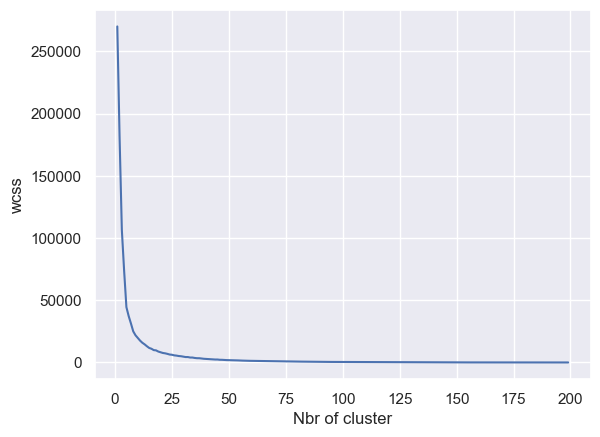

In [5]:
sns.set()
from matplotlib import pyplot as plt
plt.plot(range(1,200),wcss)
plt.xlabel("Nbr of cluster")
plt.ylabel('wcss')
plt.show()

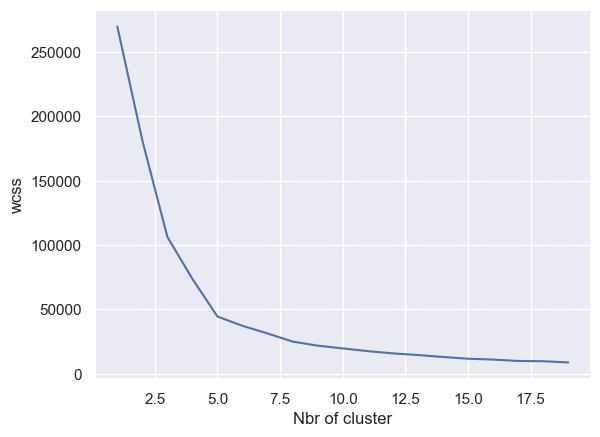

In [6]:
plt.plot(range(1,20),wcss[0:19])
plt.xlabel("Nbr of cluster")
plt.ylabel('wcss')
plt.show()

best cluster is 5 from the elbow grapth

In [9]:
model=KMeans(n_clusters=5,random_state=42)
Y=model.fit_predict(X)


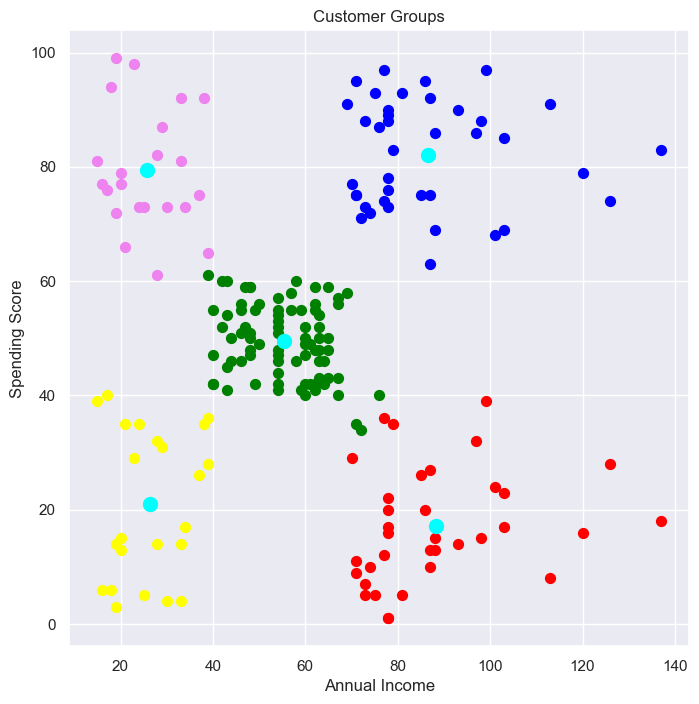

In [10]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()